# Исследование надежности заемщиков


In [27]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

## Предобработка данных

### Выгрузка данных

In [28]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [30]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [31]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [32]:
data['days_employed'] = data['days_employed'].abs()

In [33]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [34]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [35]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [36]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков

In [37]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [38]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [39]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [40]:
data['education'] = data['education'].str.lower()

In [41]:
data.duplicated().sum()

71

In [42]:
data = data.drop_duplicates()

### Категоризация данных

In [43]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [44]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [45]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [46]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [47]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследование данных

In [48]:
data_pivot = data.pivot_table(index='children', values='debt', aggfunc=['count','mean', 'sum'])
data_pivot.columns = ['Общее количество', 'Доля должников', 'Количество должников']
data_pivot

,Общее количество,Доля должников,Количество должников
children,,,
0,14091,0.075438,1063
1,4808,0.092346,444
2,2052,0.094542,194
3,330,0.081818,27
4,41,0.097561,4
5,9,0.000000,0


In [49]:
import seaborn as sns

data_child = pd.DataFrame(data=data[['children', 'debt']], columns=['children', 'debt'])

#функция для разделения на категории по наличию детей
def category_child(children):
    if children == 0:
        return 'нет детей'
    else:
        return 'есть дети'
#применение функции для создания нового столбца 'child_category'
data_child['child_category'] = data_child['children'].apply(category_child)

#подсчет количества должников с детьми
debt_with_child = data_child[(data_child['child_category'] == 'есть дети') & (data_child['debt'] == 1)]['children'].count() \
    / data_child[data_child['child_category'] == 'есть дети']['child_category'].count()
#подсчет количества должников без детей
debt_without_child = data_child[(data_child['child_category'] == 'нет детей') & (data_child['debt'] == 1)]['children'].count() \
    / data_child[data_child['child_category'] == 'нет детей']['child_category'].count() 

print(f'Процент должников с детьми = {debt_with_child * 100:.2f}%')
print(f'Процент должников без детей = {debt_without_child * 100:.2f}%')

Процент должников с детьми = 9.24%
Процент должников без детей = 7.54%


In [50]:
#Функция для разделения данных на категории по количеству детей (0, 1, 2, 3+)
def count_child(children):
    if children == 0:
        return 0
    elif children == 1:
        return 1
    elif children == 2:
        return 2
    else:
        return '3+'

#Создание нового столбца 'count_child' для результатов выполнения созданной функции
data_child['count_child'] = data_child['children'].apply(count_child)    

#подсчет процентного соотношения количества должников по каждой категории
one_child = data_child[(data_child['count_child'] == 1) & (data_child['debt'] == 1)]['children'].count() \
                        / data_child[data_child['count_child'] == 1]['child_category'].count()
two_child = data_child[(data_child['count_child'] == 2) & (data_child['debt'] == 1)]['children'].count() \
                        / data_child[data_child['count_child'] == 2]['child_category'].count()
three_plus_child = data_child[(data_child['count_child'] == '3+') & (data_child['debt'] == 1)]['children'].count() \
                        / data_child[data_child['count_child'] == '3+']['child_category'].count()

print(f'Процент должников без детей = {debt_without_child * 100:.2f}%')
print(f'Процент должников с одним ребенком = {one_child * 100:.2f}%')
print(f'Процент должников с двумя детьми = {two_child * 100:.2f}%')
print(f'Процент должников с тремя и более детьми = {three_plus_child * 100:.2f}%')

Процент должников без детей = 7.54%
Процент должников с одним ребенком = 9.23%
Процент должников с двумя детьми = 9.45%
Процент должников с тремя и более детьми = 8.16%


In [51]:
count_0 = data_child[data_child['count_child'] == 0]['debt'].count()
count_1 = data_child[data_child['count_child'] == 1]['debt'].count()
count_2 = data_child[data_child['count_child'] == 2]['debt'].count()
count_3 = data_child[data_child['count_child'] == '3+']['debt'].count()
data_child['count_child'].value_counts()

0     14091
1      4808
2      2052
3+      380
Name: count_child, dtype: int64

In [52]:
#Создание таблицы для визуализации результатов
child_count = [debt_without_child*100 , one_child*100 , two_child*100 , three_plus_child*100]
df_count_child = pd.DataFrame(data = {'Количество детей': ['0', '1', '2', '3+'], 'Процент должников': child_count })
df_count_child['Количество заемщиков'] = [count_0, count_1, count_2, count_3]
df_count_child

,Количество детей,Процент должников,Количество заемщиков
0,0,7.543822,14091
1,1,9.234609,4808
2,2,9.454191,2052
3,3+,8.157895,380


In [53]:
data_pivot = data.pivot_table(index='children', values='debt', aggfunc=['count','mean', 'sum'])
data_pivot.columns = ['Количество заемщиков', 'Доля должников', 'Количество должников']
data_pivot

,Количество заемщиков,Доля должников,Количество должников
children,,,
0,14091,0.075438,1063
1,4808,0.092346,444
2,2052,0.094542,194
3,330,0.081818,27
4,41,0.097561,4
5,9,0.000000,0


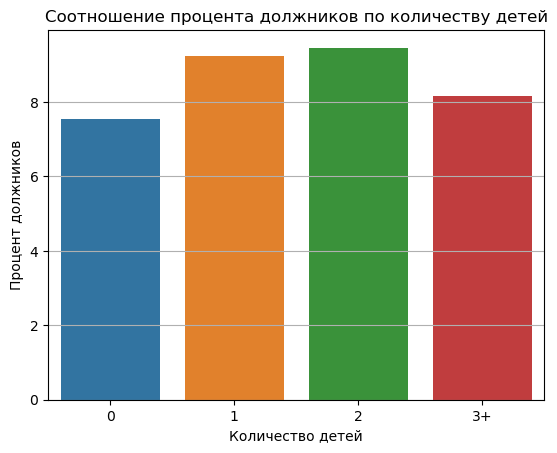

In [54]:
#Визуализация соотношения категорий с помощью библиотеки seaborn и метода barplot
ax = sns.barplot(data=df_count_child, x='Количество детей', y='Процент должников')
import matplotlib.pyplot as plt
ax.set_title('Соотношение процента должников по количеству детей')
plt.grid(axis='y')
plt.show()

**Вывод:**\
По результатам исследования можно сделать вывод, что количество детей влияет на возврат кредита в срок.\
Таким образом, график показывает, что если детей нет, то шанс возврата задолженности в срок наивысший, среди остальных категорий. Также можно отметить, если количество детей 3 или более, то шансы возврата кредита в срок становятся больше, чем если детей 1 или 2.\
Было решено объединить 3,4,5 детей в одну категории ('3+'), т.к. для 4 и 5 в данных слишком маленькая выборка, что не будет отражать действительность.

Сравнив категории с 0,1 и 2 детьми наблюдается зависимость по увеличению количества детей. Чем детей больше, тем сложнее заемщикам возвращать кредит в срок.

In [55]:
data_family = pd.DataFrame(data=data[['family_status', 'family_status_id', 'debt']], \
                           columns=['family_status', 'family_status_id', 'debt'])
data_family.groupby('family_status').count()

,family_status_id,debt
family_status,,
Не женат / не замужем,2796,2796
в разводе,1189,1189
вдовец / вдова,951,951
гражданский брак,4134,4134
женат / замужем,12261,12261


In [56]:
#посчитать количество должников для каждой категории семейного положения
#женат/замужем - 0
#гражданский брак - 1
#вдовец/вдова - 2
#в разводе - 3
#не женат/не замужем - 4
family_debt = []

#циклом проходим по длине уникальных значений семейного положение
#для каждой категории высчитываем процент должников относительно всех в этой категории и выводим значения
for i in range(len(data_family['family_status'].unique())):
    family_debt.append(data_family[(data_family['family_status_id'] == i) & (data_family['debt'] == 1)]['debt'].count() \
            / data_family[data_family['family_status_id'] == i]['debt'].count())
    print(f'Процент должников среди категории {data_family["family_status"].unique()[i]} = {family_debt[i] * 100:.2f}%')

Процент должников среди категории женат / замужем = 7.56%
Процент должников среди категории гражданский брак = 9.31%
Процент должников среди категории вдовец / вдова = 6.62%
Процент должников среди категории в разводе = 7.06%
Процент должников среди категории Не женат / не замужем = 9.76%


In [57]:
#Создание таблицы для визуализации результатов
family_status_debt = []
for i in family_debt:
    family_status_debt.append(i*100)
family_status = data_family['family_status'].unique()
df_family_status_debt = pd.DataFrame(data = {'Семейное положение': family_status, 'Процент должников': family_status_debt })
df_family_status_debt

,Семейное положение,Процент должников
0,женат / замужем,7.560558
1,гражданский брак,9.313014
2,вдовец / вдова,6.624606
3,в разводе,7.064760
4,Не женат / не замужем,9.763948


In [58]:
data_pivot = data.pivot_table(index='family_status', values='debt', aggfunc=['count', 'mean', 'sum'])
data_pivot.columns = ['Количество заемщиков', 'Доля должников', 'Коичество должников']
data_pivot

,Количество заемщиков,Доля должников,Коичество должников
family_status,,,
Не женат / не замужем,2796,0.097639,273
в разводе,1189,0.070648,84
вдовец / вдова,951,0.066246,63
гражданский брак,4134,0.093130,385
женат / замужем,12261,0.075606,927


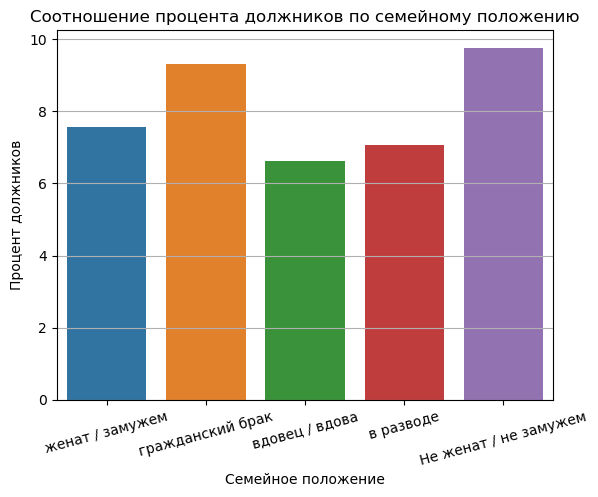

In [59]:
#Визуализация соотношения категорий с помощью библиотеки seaborn и метода barplot
ax = sns.barplot(data=df_family_status_debt, x='Семейное положение', y='Процент должников')
import matplotlib.pyplot as plt
ax.set_title('Соотношение процента должников по семейному положению')
plt.grid(axis='y')
plt.xticks(rotation = 15)
plt.show()

**Вывод:** \
Исследовав наличие зависимости между семейным положением и возвратом кредита в срок, можно сделать вывод, что да, такая зависимость действително наблюдается.\
На графике хорошо видно, что если люди находятся в гражданском браке или не женаты/не замужем, то количество долгов в этих категориях значительно больше остальных (практически на 3% больше, чем у категории "вдовец/вдова".\
Возможно такая зависимость наблюдается из-за пониженной ответственности людей находящихся в гражданском браке, либо не женат/не замужем.

In [60]:
data['total_income_category'].unique()

array(['B', 'C', 'D', 'E', 'A'], dtype=object)

In [61]:
income_debt = []
n = 0

for i in data['total_income_category'].unique():
    income_debt.append(data[(data['total_income_category'] == i) & (data['debt'] == 1)]['debt'].count() \
            / data[data['total_income_category'] == i]['debt'].count())
    print(f'Процент должников среди категории с доходом {i} = {income_debt[n]*100:.2f}%')
    n +=1
    
data['total_income_category'].value_counts()

Процент должников среди категории с доходом B = 7.06%
Процент должников среди категории с доходом C = 8.50%
Процент должников среди категории с доходом D = 6.02%
Процент должников среди категории с доходом E = 9.09%
Процент должников среди категории с доходом A = 8.00%


C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

In [62]:
data_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'mean', 'sum'])
data_pivot.columns = ['Количество заемщиков', 'Доля должников', 'Количество должников']
data_pivot

,Количество заемщиков,Доля должников,Количество должников
total_income_category,,,
A,25,0.080000,2
B,5014,0.070602,354
C,15921,0.084982,1353
D,349,0.060172,21
E,22,0.090909,2


In [63]:
#Создание таблицы для визуализации результатов
income_debt_percent = []
for i in income_debt:
    income_debt_percent.append(i*100)
income_category = ['200 001 - 1 000 000', '50 0001 - 200 000', '30 001 - 50 000']
df_income_category_debt = pd.DataFrame(data = {'Доход': income_category, 'Процент должников': income_debt_percent[:3] })
df_income_category_debt

,Доход,Процент должников
0,200 001 - 1 000 000,7.060231
1,50 0001 - 200 000,8.498210
2,30 001 - 50 000,6.017192


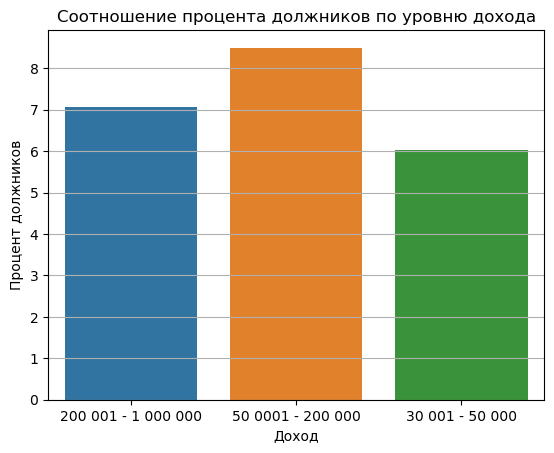

In [64]:
#Визуализация соотношения категорий с помощью библиотеки seaborn и метода barplot
ax = sns.barplot(data=df_income_category_debt, x='Доход', y='Процент должников')
import matplotlib.pyplot as plt
ax.set_title('Соотношение процента должников по уровню дохода')
plt.grid(axis='y')
plt.show()

**Вывод:** \
По категориям, где уровень дохода от 0 до 30000 и от 1000000 и выше, по данным получается слишком маленькая выборка, поэтому к общему сравнению не были добавлены.\
По остальным категориям можно сделать вывод, что чаще выплачивают кредиты в срок люди, с доходом от 30 т.р. до 50 т.р.\
А наиболее часто доводят до долгов люди, с доходом от 50 т.р. до 200 т.р.

In [65]:
purpose_debt = []
n = 0
#циклом проходим по длине уникальных значений семейного положение
#для каждой категории высчитываем процент должников относительно всех в этой категории и выводим значения
for i in data['purpose_category'].unique():
    purpose_debt.append(data[(data['purpose_category'] == i) & (data['debt'] == 1)]['debt'].count() \
            / data[data['purpose_category'] == i]['debt'].count())
    print(f'Процент должников среди категории "{data["purpose_category"].unique()[n]}" = {purpose_debt[n] * 100:.2f}%')
    n += 1

Процент должников среди категории "операции с недвижимостью" = 7.26%
Процент должников среди категории "операции с автомобилем" = 9.35%
Процент должников среди категории "получение образования" = 9.25%
Процент должников среди категории "проведение свадьбы" = 7.91%


In [66]:
#Создание таблицы для визуализации результатов
purpose_debt_percent = []
for i in purpose_debt:
    purpose_debt_percent.append(i*100)
#family_status = data_family['family_status'].unique()
df_purpose_debt = pd.DataFrame(data = {'Цель кредита': data['purpose_category'].unique(),\
                                             'Процент должников': purpose_debt_percent })
df_purpose_debt

,Цель кредита,Процент должников
0,операции с недвижимостью,7.255139
1,операции с автомобилем,9.347978
2,получение образования,9.252758
3,проведение свадьбы,7.911803


In [67]:
data_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'mean', 'sum'])
data_pivot.columns = ['Количество замещиков', 'Доля должников', 'Количество должников']
data_pivot

,Количество замещиков,Доля должников,Количество должников
purpose_category,,,
операции с автомобилем,4279,0.093480,400
операции с недвижимостью,10751,0.072551,780
получение образования,3988,0.092528,369
проведение свадьбы,2313,0.079118,183


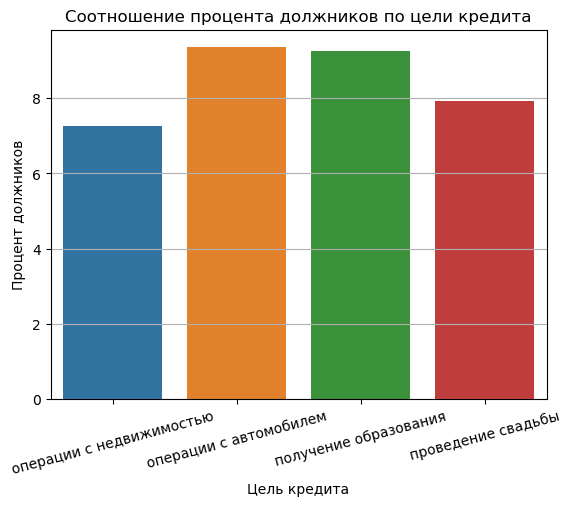

In [68]:
#Визуализация соотношения категорий с помощью библиотеки seaborn и метода barplot
ax = sns.barplot(data=df_purpose_debt, x='Цель кредита', y='Процент должников')
import matplotlib.pyplot as plt
ax.set_title('Соотношение процента должников по цели кредита')
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()

**Вывод:** \
В данном случае выборки по каждой категории достаточные, поэтому по результатам уже можно сделать какие-то выводы.\
Самыми надежными заемщика оказались те, кто брал кредит на операции с недвижимостью. \
Далее в меньшей степени надежности клиенты, которые брали кредит на проведение свадьбы.\
Самыми ненадежными оказались те, кто после выдачи кредита использовал его на автомобиль, либо на образование

<div style="border:solid orange 2px; padding: 20px"> 

## Вывод

По итогам всех исследований можно сделать вывод, что для полноценного анализа необходимо иметь досточные выборки по категориям, которые необходимо сравнить. И желательно, чтобы их было равное количество, чтобы результаты были наиболее приближены к реальности.\
Также, при отсутствии значений в исследуемом столбце, можно воспользоваться методами заполнения пропусков, например, лучшим решением для количественных переменных является медианное значение.\
Для подведения каких-либо итогов по проведенному анализу, лучше всего использовать построениие графиков, чтобы более наглядно увидеть различия данных, чем просто сравнивать цифры.

На основе полученных данных, были произведены следующие действия:
- Заполнение пропусков в данных;
В исходных данных были пропуски в двух столбцах (days_employed и total_income). Их было решено заменить на медианные значения по нужным категориям.
- Поиск и избавление от аномальных значений;
Такая ситуация сложилась со столбцом, где количество детей было равно -1, и 20. Такие данные из таблицы были убраны.
- Также из таблицы с данными были удалены дубликаты;
- Некоторые данные были объединены в зависимости от их категории(по уровню дохода и цели кредита). Таким образом были получены новые столбцы уже с более сжатой и понятной информацией для дальнейшей обработки.

В ходе исследования были выведены следующие зависимости:
- Зависимость возврата кредита в срок от количества детей. Чем детей больше, тем сложнее заемщикам возвращать кредит в срок;
- Зависимость между семейным положением и возвратом кредита в срок. Если человек был, либо на данный момент находится в браке, то они реже допускают просрочки;
- Зависимость между уровнем дохода и возвратом кредита в срок. Если оценивать по тем данным, которые можно анализировать (то есть имеют достаточную выборку), то наблюдается зависимость, что чем выше доход заемщика, тем шанс выплаты кредита в срок выше;
- Зависимость цели кредита на возврат в срок. Здесь уже данных было достаточно, поэтому можно сказать, что самыми надежными заемщиками являются те, кто брал кредит на операции с недвижимостью, либо на проведение свадьбы.

В качестве итога могу привести описания "хорошего" и "рискованного" заемщика.
    
"Хороший" заемщик - человек без детей, вдова/вдовец, с доходом 50 т.р. - 200 т.р., и с целью кредита на операции с недвижимостью.
    
"Рискованный" заемщик - человек с 2 детьми, не женат/не замужем(либо в гражданском браке), с доходом 30 - 50 т.р., с целью кредита на приобретение автомобиля.</div>